In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplsoccer
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [5]:
df  = pd.read_excel('E:/Docs/Data/England_Premier-League_2022-2023_Tottenham_vs_Manchester United.xlsx')

In [6]:
df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
3,0,6.0,a,38.6,93.2,carry,Successful,Jadon Sancho,34.4,93.3,NaN,-0.000717,25,AML,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2,NaN,a,74.4,36.0,OffsideGiven,Unsuccessful,Marcus Rashford,NaN,NaN,0.0,NaN,10,FW,Manchester United,England,Premier-League,2022-2023
1948,8,NaN,h,75.3,71.1,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1949,33,NaN,h,88.5,74.2,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1950,75,NaN,a,64.2,63.6,OffsideGiven,Unsuccessful,Anthony Martial,NaN,NaN,0.0,NaN,9,Sub,Manchester United,England,Premier-League,2022-2023


In [14]:
#get team names
team1, team2 = df.team.unique()
#A dataframe of shots
shots = df.loc[(df['type'] == 'SavedShot') | (df['type'] == 'MissedShots') | (df['type'] == 'Goal')]

In [15]:
shots

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
166,6,13.0,a,86.2,66.6,Goal,Successful,Jadon Sancho,NaN,NaN,0.0,NaN,25,AML,Manchester United,England,Premier-League,2022-2023
254,12,15.0,a,70.4,44.6,MissedShots,Successful,Marcus Rashford,NaN,NaN,0.0,NaN,10,FW,Manchester United,England,Premier-League,2022-2023
264,12,56.0,h,87.9,62.9,SavedShot,Successful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
401,18,28.0,a,89.7,64.7,SavedShot,Successful,Jadon Sancho,NaN,NaN,0.0,NaN,25,AML,Manchester United,England,Premier-League,2022-2023
404,18,30.0,a,89.6,61.7,SavedShot,Successful,Jadon Sancho,NaN,NaN,0.0,NaN,25,AML,Manchester United,England,Premier-League,2022-2023
454,20,2.0,h,71.7,31.9,MissedShots,Successful,Pedro Porro,NaN,NaN,0.0,NaN,23,DMR,Tottenham,England,Premier-League,2022-2023
509,23,16.0,a,91.9,32.8,SavedShot,Successful,Bruno Fernandes,NaN,NaN,0.0,NaN,8,AMC,Manchester United,England,Premier-League,2022-2023
535,24,43.0,a,71.3,68.7,SavedShot,Successful,Bruno Fernandes,NaN,NaN,0.0,NaN,8,AMC,Manchester United,England,Premier-League,2022-2023
578,27,56.0,h,95.9,64.1,SavedShot,Successful,Ivan Perisic,NaN,NaN,0.0,NaN,14,DML,Tottenham,England,Premier-League,2022-2023
579,28,0.0,h,87.2,32.1,SavedShot,Successful,Son Heung-Min,NaN,NaN,0.0,NaN,7,AMC,Tottenham,England,Premier-League,2022-2023


In [11]:
df['type'].value_counts()

Pass               1052
carry               352
BallRecovery        111
BallTouch            53
Clearance            46
Aerial               42
Tackle               35
TakeOn               34
Foul                 30
CornerAwarded        28
Interception         26
SavedShot            19
Dispossessed         19
Save                 18
Challenge            15
BlockedPass          12
MissedShots          11
SubstitutionOn        8
SubstitutionOff       8
KeeperPickup          8
OffsideGiven          5
OffsidePass           5
OffsideProvoked       5
Goal                  4
Card                  3
Claim                 1
ShotOnPost            1
Punch                 1
Name: type, dtype: int64

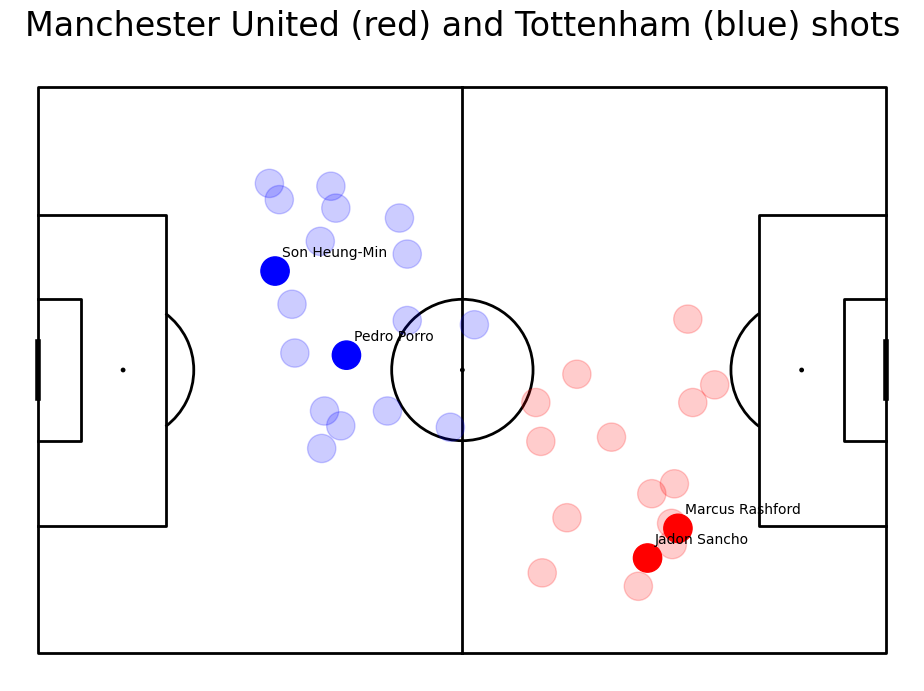

In [37]:
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(13, 8))
#Size of the pitch in yards (!!!)
pitchLengthX = 130
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information 
    x=shot['x']
    y=shot['y']
    goal=shot['type']=='Goal'
    team_name=shot['team']    
    #set circlesize
    circleSize=2
    #plot team1
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['playerName']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot team2
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['playerName'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle(team1+" (red) and "+ team2+ " (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

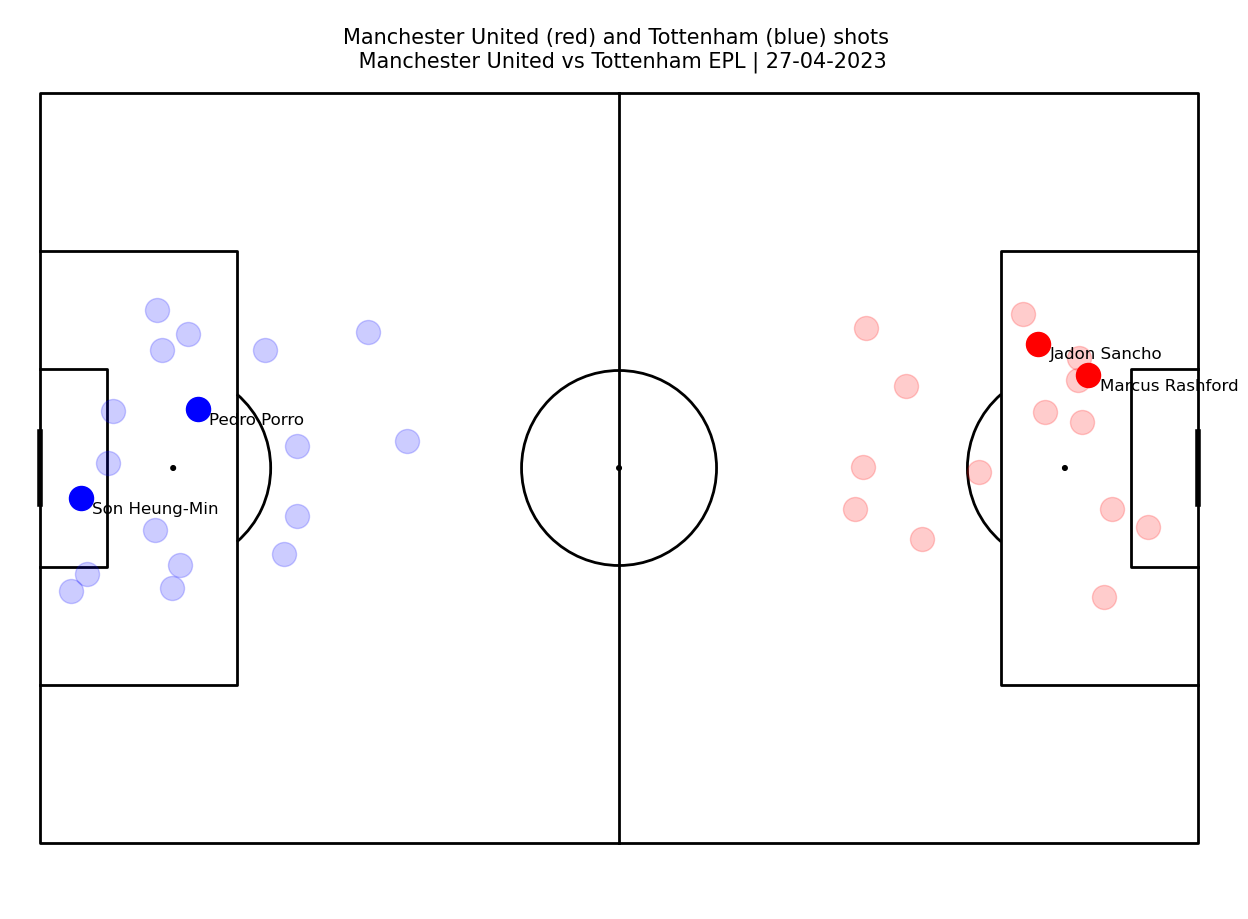

In [63]:
#create pitch
pitch = mplsoccer.Pitch(pitch_type= 'opta',pitch_color='white',line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england =  (shots.team == team1)
#finding rows in the df and keeping only necessary columns
df_england = shots.loc[mask_england, ['x', 'y', 'type', "playerName"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["type"] == 'Goal':
    #make circle 
       pitch.scatter(row.x, row.y, alpha = 1, s = 300, color = "red", ax=ax['pitch']) 
       pitch.annotate(row["playerName"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 300, color = "red", ax=ax['pitch']) 
       
mask_sweden =  (shots.team == team2)
df_sweden = shots.loc[mask_sweden, ['x', 'y', 'type', "playerName"]]   

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["type"] == 'Goal':
       pitch.scatter(100 - row.x, 100 - row.y, alpha = 1, s = 300, color = "blue", ax=ax['pitch']) 
       pitch.annotate(row["playerName"], (100 - row.x + 1, 100 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(100 - row.x, 100 - row.y, alpha = 0.2, s = 300, color = "blue", ax=ax['pitch']) 
       
fig.suptitle(team1+" (red) and "+ team2+ " (blue) shots \n Manchester United vs Tottenham EPL | 27-04-2023", fontsize = 15)           
plt.show()

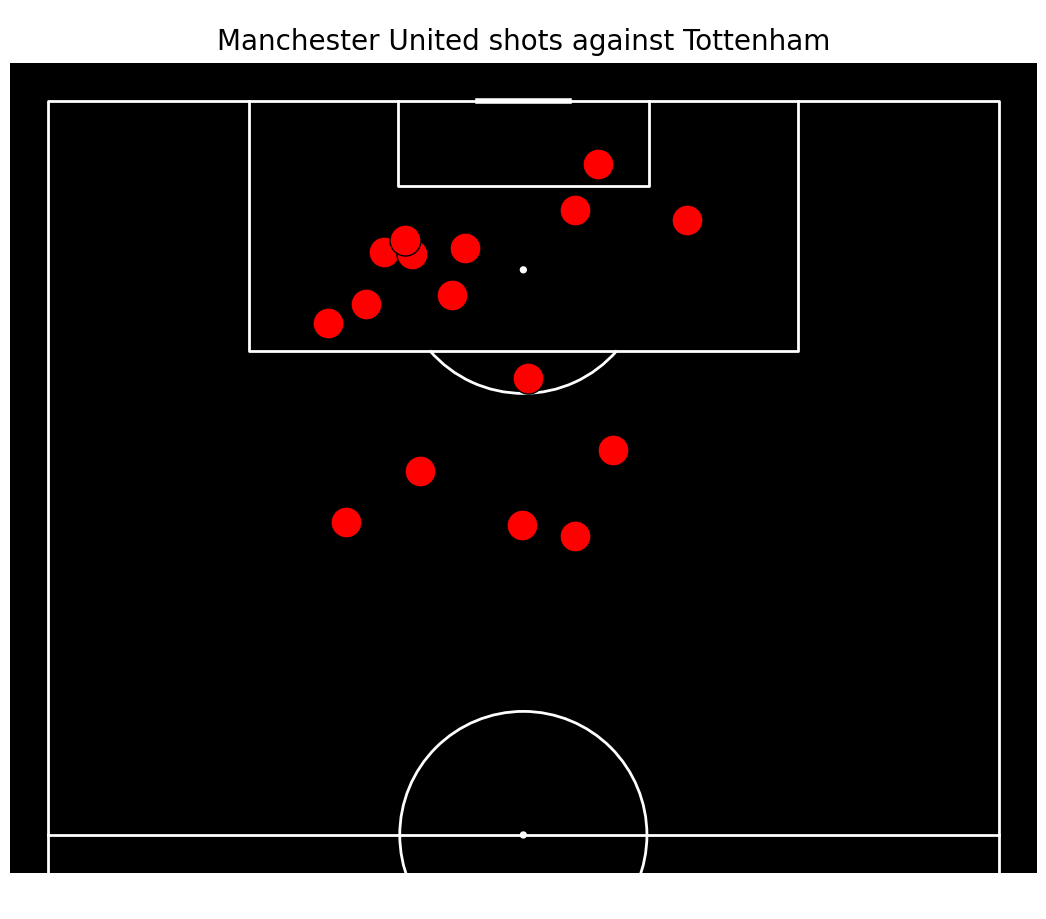

In [62]:
pitch = VerticalPitch(half = True,pitch_type= 'opta',pitch_color='black',line_color='White')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black") 
fig.suptitle(team1 +" shots against "+team2, fontsize = 20)           
plt.show()